In [1]:
import pandas as pd
import numpy as np

## Data Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Libraries to Handle Categorical Columns and Numerical Columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Library To Split the Data into Train and Test Data and to perform Cross Validation.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Libraries to Import Machine Learning Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Libraries to Show Classification Metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

dataset_url = https://www.kaggle.com/overload10/adult-census-dataset

In [2]:

data = pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
new_column_name = data.columns.str.replace("-","_").str.lower()
data.columns = new_column_name

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
## Lets Check Missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [8]:
## Drop duplicates rows from the data
def remove_duplicates(data):
    data.drop_duplicates(keep='first',inplace=True)
    return "Checked Duplicates"
remove_duplicates(data)


'Checked Duplicates'

In [9]:
## Explore Categorical Columns

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [10]:
## List of all categorical columns
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [11]:
## Show unique values in Categorical Columns and its Frequency.

def more_info_about_categorical_columns(data_set, categorical_col):
    for index, col_name in enumerate(categorical_col):
        print('Total number of unique values in',categorical_col[index],'columns is ',data_set[col_name].nunique(),'Its Unique Values are',data_set[col_name].unique())
        print(data_set[col_name].value_counts())
        print('*'*100)

In [12]:
more_info_about_categorical_columns(data, categorical_columns)

Total number of unique values in workclass columns is  9 Its Unique Values are [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
****************************************************************************************************
Total number of unique values in education columns is  16 Its Unique Values are [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm    

In [13]:
## As we see many columns contains '?' symbol which means none. 
## Lets do some data cleaning steps this function will remove all white spaces and '?' symbols.

def remove_special_characters(data_set, columns):
    for col in columns:
        data_set[col] = data_set[col].str.strip()
        data_set[col] = data[col].map(lambda x: np.nan if x=="?" else x)
    return data_set
    


In [14]:
remove_special_characters(data, categorical_columns)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
##  Percentage of missing data
(data.isnull().sum()/data.shape[0])*100

age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
country           1.788733
salary            0.000000
dtype: float64

In [16]:
data.loc[data['salary'] != '<=50K']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
## Categoricla Valsues Encoding Techniques

In [18]:
## Encode target columns i.e >50K to 1 and <=50K to 0.
data['salary'] = data['salary'].map({'<=50K':0,'>50K':1})

In [19]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
## Encoding Categorical Data

def label_education (row):
    if row['education'] in ["11th", "9th", "7th-8th", "5th-6th", "10th", "1st-4th", "12th", "preschool"]:
        return "Compulsory"
    if row['education'] in ["Bachelors","Some-college"]:
        return "Bachelors"
    if row['education'] in ["Assoc-acdm","Assoc-voc"]:
        return 'Associate'
    if row['education'] in ["HS-grad"]:
        return 'High_School_grad'
    if row['education'] in ["Doctorate","Prof-school"]:
        return 'Professor'
    if row['education'] in ['Masters']:
        return 'Masters'

In [21]:
data['education_level'] = data.apply(lambda row: label_education(row), axis=1)

data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,education_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,High_School_grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Compulsory
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,Associate
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,High_School_grad
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,High_School_grad
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,High_School_grad


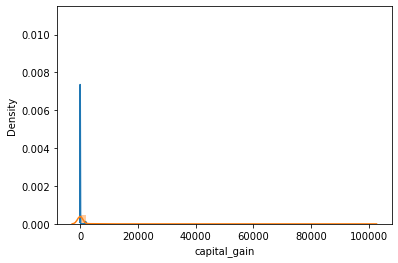

In [22]:
sns.distplot(data['capital_loss'])
sns.distplot(data['capital_gain'])

In [23]:
## Scaling of Numerical Columns

scaling = MinMaxScaler()
data[['capital_gain','capital_loss']] = scaling.fit_transform(data[['capital_gain','capital_loss']])

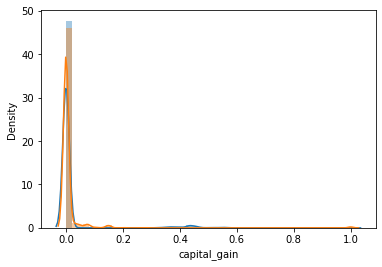

In [24]:
sns.distplot(data['capital_loss'])
sns.distplot(data['capital_gain'])

In [25]:
## Dropped columns
data.drop(['fnlwgt','education'],axis=1,inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              32537 non-null  int64  
 1   workclass        30701 non-null  object 
 2   education_num    32537 non-null  int64  
 3   marital_status   32537 non-null  object 
 4   occupation       30694 non-null  object 
 5   relationship     32537 non-null  object 
 6   race             32537 non-null  object 
 7   sex              32537 non-null  object 
 8   capital_gain     32537 non-null  float64
 9   capital_loss     32537 non-null  float64
 10  hours_per_week   32537 non-null  int64  
 11  country          31955 non-null  object 
 12  salary           32537 non-null  int64  
 13  education_level  32487 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 3.7+ MB


In [27]:
## Dropped Null Values in the Dataset
data = data.dropna(axis = 0, how ='any') 

In [28]:
data.isnull().sum()

age                0
workclass          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
country            0
salary             0
education_level    0
dtype: int64

In [29]:
## Save data to clean data set
data.to_csv('clean_data.csv',index=False) 

In [30]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

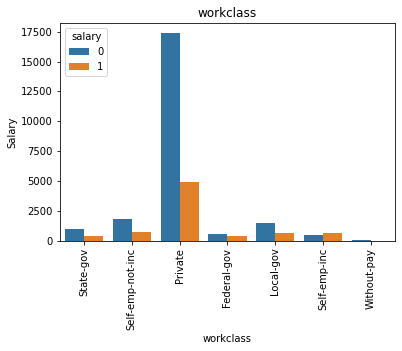

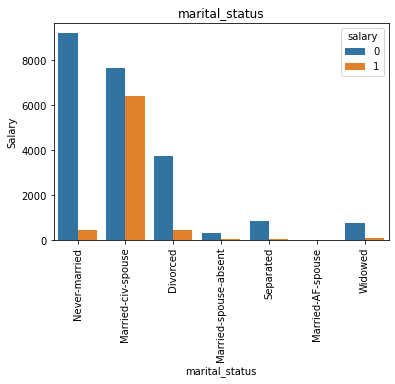

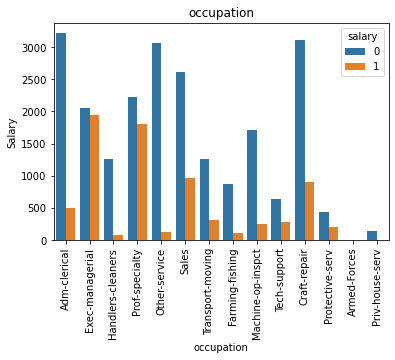

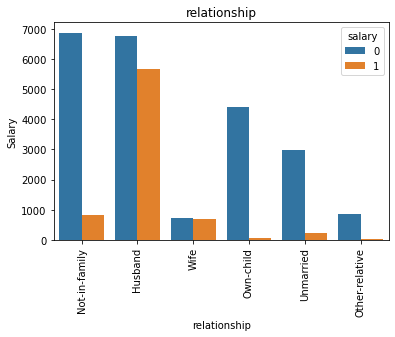

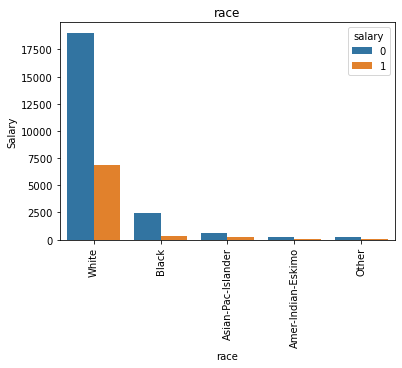

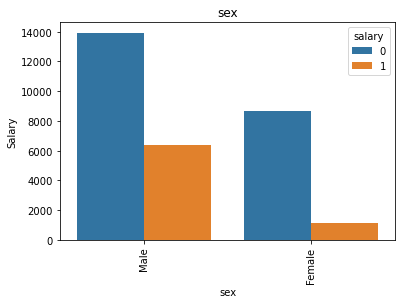

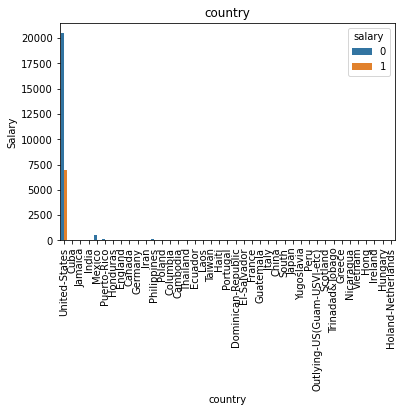

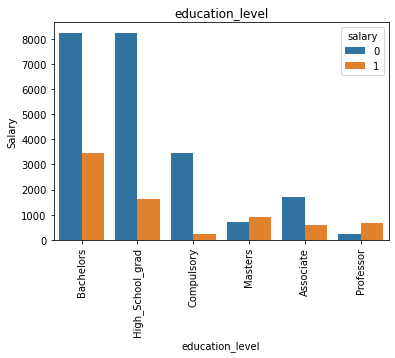

In [31]:
## Visulaization of Categorical Columns
for x in categorical_columns:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(data[x],data=data,hue=data['salary']);
    plt.xlabel(x)
    plt.ylabel('Salary')
    plt.title(x)
    plt.xticks(rotation=90)

In [32]:
## Encoding of Categorical Values
data = pd.get_dummies(data, prefix_sep='_',drop_first = True)

In [33]:
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,education_level_Bachelors,education_level_Compulsory,education_level_High_School_grad,education_level_Masters,education_level_Professor
0,39,13,0.02174,0.0,40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,50,13,0.00000,0.0,13,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,38,9,0.00000,0.0,40,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,53,7,0.00000,0.0,40,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,28,13,0.00000,0.0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
data.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'salary', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
    

In [35]:
## Separate the Dependent Columns from Independent Columns
X = data.drop(['salary'],axis=1)
y = data['salary']

In [36]:
y.shape

(30095,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape

(24076, 85)

In [39]:
y_test.shape

(6019,)

In [40]:
y_train.shape

(24076,)

In [41]:
log_regression = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
xgboost_classifier = XGBClassifier()
naive_bayes_classifier = GaussianNB()
knn_classifier =  KNeighborsClassifier()
random_forest_classifier =  RandomForestClassifier()
svm_classifier =  SVC()


ml_models = [log_regression, decision_tree_classifier, xgboost_classifier,knn_classifier,random_forest_classifier,svm_classifier]
model_dict = {0:'Logistic Regression',1:'Decision Tree Classifier',2:'XGBoost Classifier',3:'Naive Bayes Classifier',4:'KNeighbors Classifier',5:'Random Forest Classifier',6:'Support Vector Classification'}

In [42]:
for model in ml_models:
    model.fit(X_train, y_train)

In [43]:
for i, models in enumerate(ml_models):
    print( model_dict[i],models.score(X_test, y_test)) 

Logistic Regression 0.8323641800963615
Decision Tree Classifier 0.8154178434955973
XGBoost Classifier 0.8725701943844493
Naive Bayes Classifier 0.8041202857617544
KNeighbors Classifier 0.8488120950323974
Random Forest Classifier 0.8185745140388769


In [44]:
for i, models in enumerate(ml_models):
    print('Cross Validation Score of',model_dict[i],'is', (cross_val_score(models,X,y,cv=10)).mean()) 

Cross Validation Score of Logistic Regression is 0.8341920970201245
Cross Validation Score of Decision Tree Classifier is 0.8165476328489614
Cross Validation Score of XGBoost Classifier is 0.8688156681671486
Cross Validation Score of Naive Bayes Classifier is 0.8025918700156451
Cross Validation Score of KNeighbors Classifier is 0.8428314723603277
Cross Validation Score of Random Forest Classifier is 0.820601528747092


In [45]:
for i, models in enumerate(ml_models):
    y_pred = models.predict(X_test)
    
    print('Classification Report of',model_dict[i])
    print(classification_report(y_test, y_pred))
    print('*'*100)

Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4482
           1       0.71      0.59      0.64      1537

    accuracy                           0.83      6019
   macro avg       0.79      0.75      0.77      6019
weighted avg       0.83      0.83      0.83      6019

****************************************************************************************************
Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4482
           1       0.65      0.61      0.63      1537

    accuracy                           0.82      6019
   macro avg       0.76      0.75      0.75      6019
weighted avg       0.81      0.82      0.81      6019

****************************************************************************************************
Classification Report of XGBoost Classifier
     

### As we see data is imbalanced lets do some Randomoversampling to balance the datasets and then check the performance of each model.

In [46]:
print(X.shape,y.shape)

(30095, 85) (30095,)


In [47]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X, y)
X_train_res.shape,y_train_res.shape

((45178, 85), (45178,))

In [48]:

print('Original dataset shape {}'.format(y.value_counts()))
print('Resampled dataset shape {}'.format(y_train_res.value_counts()))

Original dataset shape 0    22589
1     7506
Name: salary, dtype: int64
Resampled dataset shape 0    22589
1    22589
Name: salary, dtype: int64


In [49]:
for model in ml_models:
    model.fit(X_train_res, y_train_res)

In [50]:
for i, models in enumerate(ml_models):
    print( model_dict[i],models.score(X_test, y_test)) 

Logistic Regression 0.7956471174613723
Decision Tree Classifier 0.9720883867752118
XGBoost Classifier 0.8672536966273467
Naive Bayes Classifier 0.8363515534141884
KNeighbors Classifier 0.9709254028908456
Random Forest Classifier 0.7768732347566041


In [51]:
for i, models in enumerate(ml_models):
    y_pred = models.predict(X_test)
    print('Classification Report of',model_dict[i])
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('*'*100)

Classification Report of Logistic Regression
[[3497  985]
 [ 245 1292]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      4482
           1       0.57      0.84      0.68      1537

    accuracy                           0.80      6019
   macro avg       0.75      0.81      0.76      6019
weighted avg       0.84      0.80      0.81      6019

****************************************************************************************************
Classification Report of Decision Tree Classifier
[[4348  134]
 [  34 1503]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4482
           1       0.92      0.98      0.95      1537

    accuracy                           0.97      6019
   macro avg       0.96      0.97      0.96      6019
weighted avg       0.97      0.97      0.97      6019

************************************************************************************************

In [52]:
model = decision_tree_classifier
import pickle
pickle_out = open('model.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()
